## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Author: Nilam Sanjay Deshmukh.

#### Import libraries

In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns


#### Reading csv file

In [3]:
# data= http://bit.ly/w-data

In [4]:
data = pd.read_csv("http://bit.ly/w-data")

data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


## Exploratory Data Analysis

In [6]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [7]:
data.shape

(25, 2)

In [8]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [11]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#### visualise the data


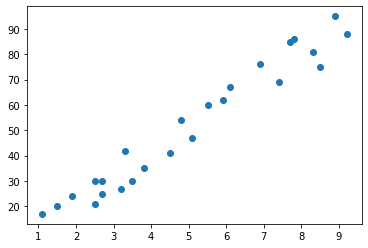

In [12]:
# Scatter plot

plt.scatter(x='Hours', y='Scores', data=data)
plt.show()

Observation: We can clearly notice that Number of Hours studied is linearly related to the Scores of the student.



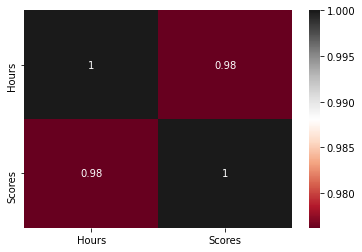

In [13]:
# Heatmap

sns.heatmap(data.corr(), annot=True, cmap='RdGy')
plt.show()

## Performing simple linear regression

####  Splitting the data into for training and testing

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data['Hours'].values.reshape(-1,1), data['Scores'], test_size = 0.2, random_state = 42)

In [16]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((20, 1), (20,), (5, 1), (5,))

#### Training the Linear Regression Model¶


In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### Plotting the predicted Line


In [19]:
coefficient = model.coef_
intercept = model.intercept_

# Since, y = m*x + c
line = (data['Hours'].values * coefficient) + intercept

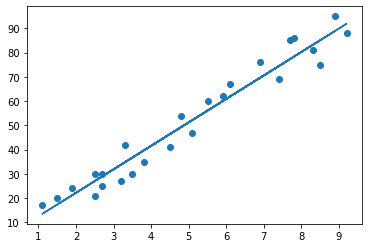

In [20]:
plt.scatter(data.Hours, data.Scores)
plt.plot(data.Hours, line)
plt.show()


In [21]:
pred = model.predict(X_test)
pred

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

#### Comparing Actual and Predicted Values


In [22]:
pred_compare = pd.DataFrame({'Actual Values': y_test, 'Predicted Values':pred})
pred_compare

,Actual Values,Predicted Values
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


#### Evaluating the Model


In [23]:
from sklearn import metrics

In [24]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, pred))
print("Root Mean Squared Error: ", metrics.mean_squared_error(y_test, pred)**0.5)
print("R2 Score: ", metrics.r2_score(y_test, pred))

Mean Absolute Error:  3.9207511902099244
Mean Squared Error:  18.943211722315272
Root Mean Squared Error:  4.352380006653288
R2 Score:  0.9678055545167994


In [25]:
hours = np.asarray(9.25).reshape(-1,1)
print(f"{model.predict(hours)[0]} will be predicted score if a student study for 9.25 hrs in a day.")

92.38611528261494 will be predicted score if a student study for 9.25 hrs in a day.
